In [2]:
import cv2
import json
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

#### json file read 

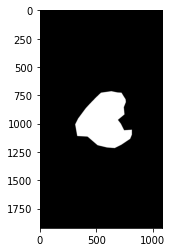

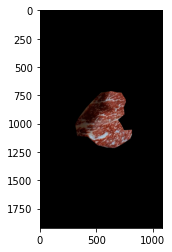

In [10]:
# 본인 이미지 경로에 맞춰 확인! 
img = Image.open("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Image_2/QC_cow_segmentation_2_000375.jpg")
with open("C:/Users/Playdata/Desktop/FinalProject/test/dataset/QC_IMAGE/Training/Label_2/QC_cow_segmentation_2_000375.json") as f:
    json_data = json.load(f)
#     print(json_data['label_info']['shapes'][0]['points'])
    contour = json_data['label_info']['shapes'][0]['points']
    for i in range(len(contour)):
        contour[i][0] = int(contour[i][0])
        contour[i][1] = int(contour[i][1])
    
    img_np = np.array(img)
    mask = np.zeros_like(img_np)
    
    polygon = contour
    polygon = np.array(polygon)
    cv2.fillPoly(mask,[polygon],(255, 255, 255))
    plt.imshow(mask)
    plt.show()
    masked = cv2.bitwise_and(img_np, mask)
plt.imshow(masked)
# print(img_1.size) 
# 1은 이미지 size가 (1080, 1920)로 맞춰짐
# (2268, 4032)도 존재...
